# RSNA Screening Mammography Breast Cancer Detection

* **Mudassar Ahmad**

* **Muhammad Waseem Akram**

* **Muhammad Fiaz**

In [2]:
import numpy as np
import pandas as pd
import os
!pip install tensorflow 
import matplotlib.pyplot as plt
import time
import os
import copy

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install -q -U keras-tuner pydicom pylibjpeg dicomsdl
import pydicom

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [4]:
!yes | apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libcudnn8
yes: standard output: Broken pipe


In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Conv2D, 
                                     MaxPooling2D, 
                                     BatchNormalization, 
                                     Dense, 
                                     Dropout,
                                     GlobalMaxPooling2D)
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

D0613 16:43:33.248101658      14 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0613 16:43:33.248133545      14 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0613 16:43:33.248140667      14 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0613 16:43:33.248144615      14 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0613 16:43:33.248155448      14 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0613 16:43:33.248162483      14 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0613 16:43:33.248166582      14 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0613 16:43:33.

In [6]:
import pylibjpeg
import cv2

In [7]:
!pip install Seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 5.8 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [8]:
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 64.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.4/219.4 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/313.2 KB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 80.3 MB/s eta 0:00:00:00:0100:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [9]:
import shutil
import dicomsdl
import tensorflow as tf
from skimage import transform
from enum import Enum, auto
from tqdm import tqdm
import shutil
from PIL import Image
import keras_tuner as kt

# Distribution strategy

In [10]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver().connect()
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy() # for CPU and single GPU
print('Number of replicas:', strategy.num_replicas_in_sync)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


Number of replicas: 8


# Load the dateset

In [11]:
path_csv = '/kaggle/input/rsna-breast-cancer-detection'
path_image='/kaggle/input/rsna-breast-cancer-512-pngs'

# load the csv_file
train_df =pd.read_csv(os.path.join(path_csv, 'train.csv'))
test_df =pd.read_csv(os.path.join(path_csv,'test.csv'))

#define the images path
train_dir = os.path.join(path_csv,'train_images')
test_dir = os.path.join(path_csv,'test_images')

# To Understand the dataset

In [12]:
display(train_df)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54701,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False
54702,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False
54703,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False
54704,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True


To see the train dataset

In [13]:
print('The train shape' , train_df.shape)


print("The number of unique images =", train_df['image_id'].nunique())
print('The number of patients =', train_df['patient_id'].nunique())

print("The number of unique machine =",train_df["machine_id"].nunique())
print("The number of unique view =", train_df['view'].nunique())


print("The number of unique sites =", train_df['site_id'].nunique())
print('The number of cancer images',len(train_df[train_df.cancer == 1]))
print('The number of Non-cancer images',len(train_df[train_df.cancer == 0]))
display(train_df.head())

The train shape (54706, 14)
The number of unique images = 54706
The number of patients = 11913
The number of unique machine = 10
The number of unique view = 6
The number of unique sites = 2
The number of cancer images 1158
The number of Non-cancer images 53548


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


To see the test data set

In [14]:
display(test_df)

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


In [15]:
print('The test data set shape', test_df.shape)
print("The number of unique images  =", test_df['image_id'].nunique())
print('The number of patients       =', test_df['patient_id'].nunique())

print("The number of unique machine =",test_df["machine_id"].nunique())
print("The number of unique view    =", test_df['view'].nunique())


print("The number of unique sites   =", test_df['site_id'].nunique())
display(test_df)

The test data set shape (4, 9)
The number of unique images  = 4
The number of patients       = 1
The number of unique machine = 1
The number of unique view    = 2
The number of unique sites   = 1


,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


# To prepare the balance dataset from a given dataset

In [16]:
train_cancer= train_df[train_df.cancer == 1]
display(train_cancer.head())
train_cancer.laterality.value_counts()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
87,1,10130,388811999,L,MLO,71.0,1,1,1,0.0,0,B,49,False
88,1,10130,613462606,L,CC,71.0,1,1,1,0.0,0,B,49,False
89,1,10130,1360338805,L,CC,71.0,1,1,1,0.0,0,B,49,False
90,1,10130,1672636630,L,MLO,71.0,1,1,1,0.0,0,B,49,False
190,1,10226,461614796,L,MLO,71.0,1,1,1,0.0,0,C,49,False


laterality
L    588
R    570
Name: count, dtype: int64

In [17]:
train_non_cancer= train_df[train_df.cancer==0]
train_non_cancer_L=train_non_cancer[train_non_cancer.laterality=='L'][:588]
display(train_non_cancer_L.head())
display(train_non_cancer_L.shape)
train_non_cancer_R=train_non_cancer[train_non_cancer.laterality=='R'][:570]
display(train_non_cancer_R.head())
display(train_non_cancer_R.shape)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
5,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True
8,2,10025,562340703,L,CC,75.0,0,0,0,NaN,0,NaN,29,False


(588, 14)

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
6,2,10011,541722628,R,CC,55.0,0,0,0,NaN,0,NaN,21,False
7,2,10011,1031443799,R,MLO,55.0,0,0,0,NaN,0,NaN,21,False
10,2,10025,288394860,R,CC,75.0,0,0,0,NaN,0,NaN,29,False


(570, 14)

In [18]:
train_n_cancer=pd.concat([train_non_cancer_L,train_non_cancer_R])
train_n_cancer

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
5,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True
8,2,10025,562340703,L,CC,75.0,0,0,0,NaN,0,NaN,29,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,1,11179,1097551770,R,MLO,78.0,0,0,0,0.0,0,C,49,True
1141,1,11179,1203215296,R,CC,78.0,0,0,0,0.0,0,C,49,True
1142,1,11179,2007561658,R,MLO,78.0,0,0,0,0.0,0,C,49,True
1145,1,11195,752311316,R,CC,42.0,0,0,0,1.0,0,C,49,False


In [19]:
train_set= pd.concat([train_n_cancer,train_cancer])
train_set.reset_index(drop=True, inplace=True)
train_set

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True
3,2,10011,270344397,L,MLO,55.0,0,0,0,0.0,0,NaN,21,True
4,2,10025,562340703,L,CC,75.0,0,0,0,NaN,0,NaN,29,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,2,9707,1900919592,R,MLO,56.0,1,1,1,NaN,0,NaN,21,False
2312,2,9840,111786935,R,MLO,59.0,1,1,1,NaN,0,NaN,21,False
2313,2,9840,1559360810,R,CC,59.0,1,1,1,NaN,0,NaN,21,False
2314,2,9851,1409270544,L,MLO,58.0,1,1,0,NaN,0,NaN,48,False


In [22]:
patient_id = train_df[train_df.cancer == 1].iloc[0].patient_id
patient_id
one_patient_df = train_df[train_df.patient_id == patient_id]
one_patient_df

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
87,1,10130,388811999,L,MLO,71.0,1,1,1,0.0,0,B,49,False
88,1,10130,613462606,L,CC,71.0,1,1,1,0.0,0,B,49,False
89,1,10130,1360338805,L,CC,71.0,1,1,1,0.0,0,B,49,False
90,1,10130,1672636630,L,MLO,71.0,1,1,1,0.0,0,B,49,False
91,1,10130,1013166704,R,CC,71.0,0,0,0,NaN,0,B,49,False
92,1,10130,1165309236,R,CC,71.0,0,0,0,NaN,0,B,49,False
93,1,10130,2110820077,R,MLO,71.0,0,0,0,NaN,0,B,49,False


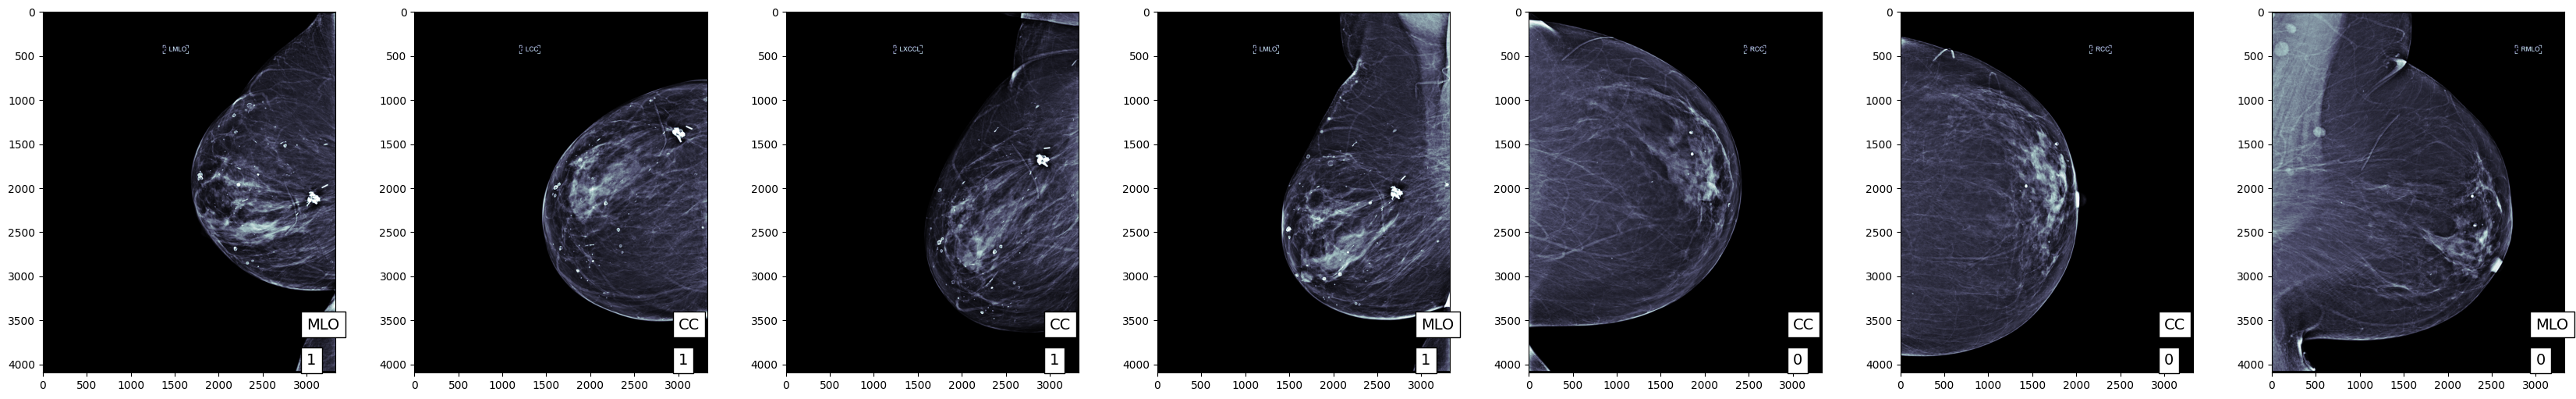

In [23]:
images_dir = '/kaggle/input/rsna-breast-cancer-detection/{}_images/{}/{}.dcm'
n_rows = len(one_patient_df)
n_rows
plt.figure(figsize=(6 * n_rows, 6))
for i in range(n_rows):
    row = one_patient_df.iloc[i]
    
    plt.subplot(1, n_rows, i + 1)
    
    img_arr = dicomsdl.open(images_dir.format('train', row.patient_id, row.image_id)).pixelData()
    plt.imshow(img_arr, cmap = plt.cm.bone)
    plt.text(3000, 3600, row['view'], fontsize = 14, bbox={'facecolor': 'white', 'pad' : 5})
    plt.text(3000, 4000, row['cancer'], fontsize = 14, bbox={'facecolor': 'white', 'pad' : 5}) 

In [24]:
plt.figure(figsize=(10, 10))
sns.countplot(data = train_df, x="laterality", hue="cancer", dodge = False)

NameError: name 'sns' is not defined

<Figure size 1000x1000 with 0 Axes>

# Now, preprosessing the images for model

In [ ]:
!rm -rf /kaggle/working/input_images

In [27]:
os.mkdir("/kaggle/working/input_images/")
os.mkdir("/kaggle/working/input_images/0/")
os.mkdir("/kaggle/working/input_images/1/")

In [ ]:
from tqdm import tqdm
import shutil


In [28]:
image_width = 256
image_height = 256

p_id = train_set.patient_id
i_id = train_set.image_id
cancer = train_set.cancer
for pid, iid, cncr in tqdm(zip(p_id, i_id, cancer)):
    tmpFile = str(pid) + "_" + str(iid) + ".png"
    tmpSrc = "/kaggle/input/rsna-breast-cancer-512-pngs/" + tmpFile
    tmpDst = "/kaggle/working/input_images/" + str(cncr) + "/" + tmpFile
    shutil.copyfile(tmpSrc, tmpDst)
    img = Image.open(tmpDst)
    img = img.resize((image_width, image_height), Image.ANTIALIAS)
    img.save(tmpDst)

0it [00:00, ?it/s]/tmp/ipykernel_14/304692095.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((image_width, image_height), Image.ANTIALIAS)
2316it [00:29, 79.71it/s]


In [29]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/input_images/",
    color_mode = "rgb",
    image_size = (256, 256),
    shuffle = True,
    validation_split = 0.25,
    subset = "training",
    seed = 2023)

Found 2316 files belonging to 2 classes.
Using 1737 files for training.


In [31]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/input_images/",
    color_mode = "rgb",
    image_size = (256, 256),
    shuffle = True,
    validation_split = 0.2,
    subset = "validation",
    seed = 70)

Found 2316 files belonging to 2 classes.
Using 463 files for validation.


In [33]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Bulid a models for cancer classification

In [34]:
with strategy.scope():
    base_model = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(image_height, image_width, 3),
    pooling="max")
    for layer in base_model.layers:
        layer.trainable = False


94668760/94668760 [==============================] - 1s 0us/step


In [36]:
from tensorflow import keras 

In [37]:

    with strategy.scope():
        model = tf.keras.Sequential()
        model.add(base_model)
        model.add(tf.keras.layers.Dense(512, activation = 'relu'))
        
        # Choose an optimal value between 32-512
        #hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
        model.add(keras.layers.Dense(352, activation='relu'))
        
        model.add(tf.keras.layers.Dense(256, activation = 'relu'))
        model.add(tf.keras.layers.Dense(128, activation = 'relu'))

        model.add(tf.keras.layers.Dropout(0.3))
        model.add(tf.keras.layers.Dense(2, activation = 'softmax'))

        for i, layer in enumerate(model.layers):
            if(layer.name == "ResNet50V2"):
                layer.trainable = False

        model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-7),
                    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

    

In [39]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5) 

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 352)               180576    
                                                                 
 dense_2 (Dense)             (None, 256)               90368     
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 2

In [43]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

# Train the model

In [45]:
history = model.fit(train_ds, validation_data = validation_ds, epochs = 250, verbose = 1, workers = 8,callbacks=stop_early)

Epoch 1/250
55/55 [==============================] - 3s 51ms/step - loss: 17.0051 - accuracy: 0.5107 - val_loss: 6.6375 - val_accuracy: 0.5659
Epoch 2/250
55/55 [==============================] - 3s 47ms/step - loss: 16.0817 - accuracy: 0.5320 - val_loss: 6.6102 - val_accuracy: 0.5680
Epoch 3/250
55/55 [==============================] - 3s 48ms/step - loss: 17.3452 - accuracy: 0.4951 - val_loss: 6.6115 - val_accuracy: 0.5702
Epoch 4/250
55/55 [==============================] - 3s 46ms/step - loss: 16.4748 - accuracy: 0.5176 - val_loss: 6.5761 - val_accuracy: 0.5659
Epoch 5/250
55/55 [==============================] - 3s 48ms/step - loss: 15.6787 - accuracy: 0.5268 - val_loss: 6.5660 - val_accuracy: 0.5680
Epoch 6/250
55/55 [==============================] - 3s 47ms/step - loss: 16.9674 - accuracy: 0.4986 - val_loss: 6.5441 - val_accuracy: 0.5659
Epoch 7/250
55/55 [==============================] - 3s 47ms/step - loss: 15.9866 - accuracy: 0.5112 - val_loss: 6.5339 - val_accuracy: 0.5680

# Visulaize the model accuracy

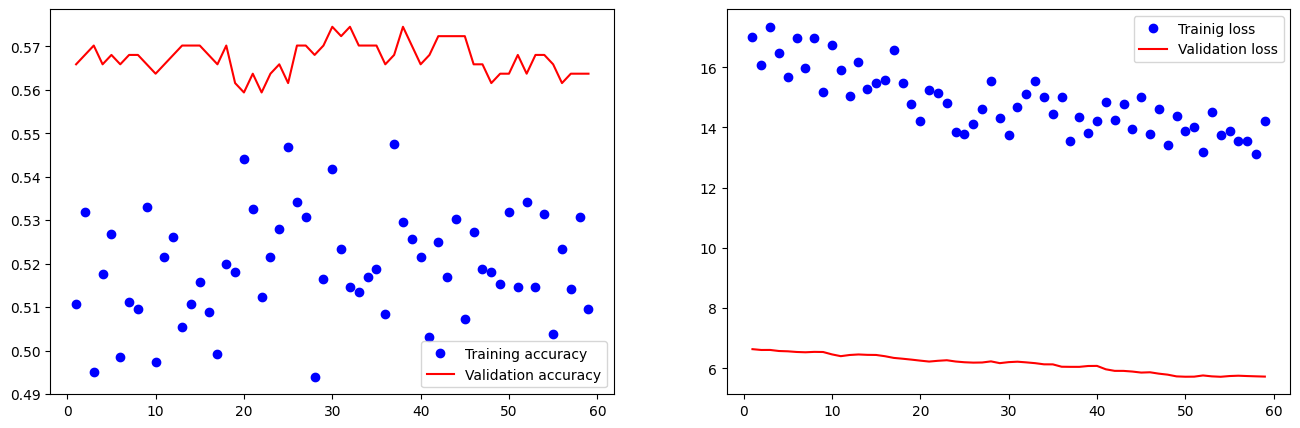

In [47]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 5))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'bo', label = 'Trainig loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.legend()

plt.show()

#  Save the model

In [48]:
!rm model.h5

rm: cannot remove 'model.h5': No such file or directory


In [50]:
model.save('model.h5')

# 

In [ ]:
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)